In [1]:
# Classification
    # Accuracy - TP + TN / All Data
    # Precision - TP / TP + FP - how many of identified +ves were actually +ve
    # Recall/ Sensitivity - TP / TP + FN - % of actual positives identified
    # F1-score - 2*Precision * Recall / Precision + Recall
        # https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
    # ROC/ AUC for balanced classes. Precision/Recall for imbalanced classes.
# SciKit Learn - uniform interface across models
    # Every model exposed as an 'estimator' object; parameters can be adjusted at instantiation
    # fit / predict / predict_proba / score / transform 
# Reference:
    # https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
    # https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [2]:
#from IPython.display import Image
#Image(filename='Sklearn_cs.png') 

## Logistic Regression

#### Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

#### EDA on 'hearing test dataset'

In [4]:
# Hearing ability (test_result) based on patient's 'age' and 'physical_score'

path = '../../GitHub/Python-Data-Science/Data/'
df = pd.read_csv(path+'hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
# Fairly balanced
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


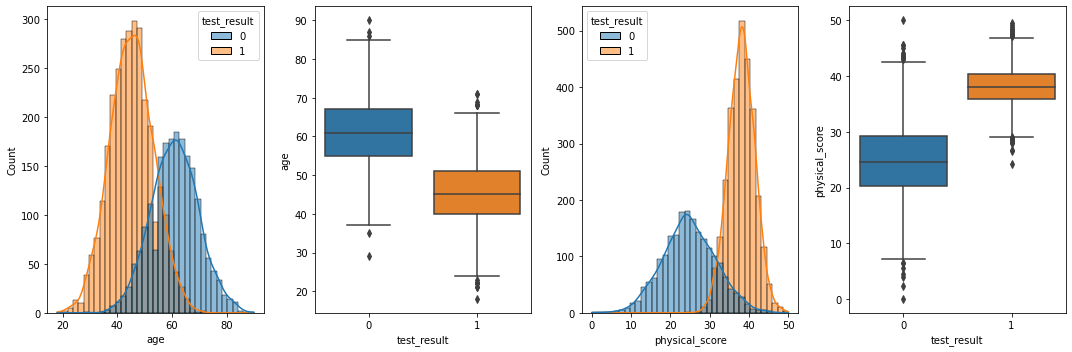

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.histplot(data=df, x='age', kde=True, hue='test_result')

plt.subplot(1,4,2)
sns.boxplot(data=df, x='test_result', y='age')

plt.subplot(1,4,3)
sns.histplot(data=df, x='physical_score', kde=True, hue='test_result')

plt.subplot(1,4,4)
sns.boxplot(data=df, x='test_result', y='physical_score')

plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='physical_score'>

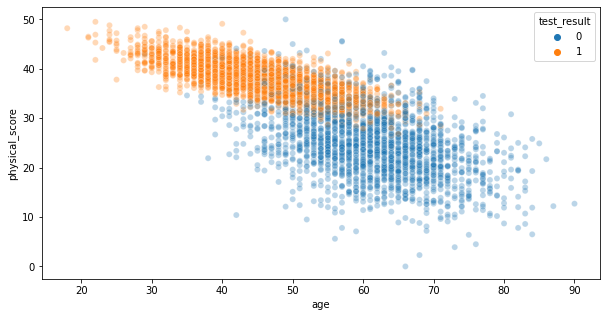

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.3)

<AxesSubplot:>

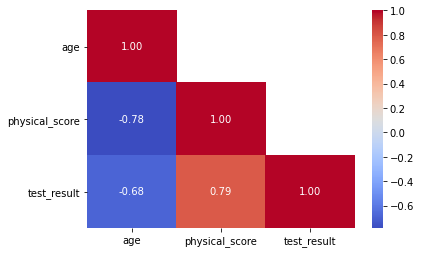

In [10]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', mask=np.triu(np.ones([3,3]), k=1))

In [11]:
#import plotly.express as px
#px.scatter_3d(df, x="age", y="physical_score", z="test_result", color="test_result", opacity=0.5)

#### Modeling & Performance

In [12]:
X = df.drop(columns='test_result')
y = df['test_result']

In [13]:
X.head(2)

,age,physical_score
0,33.0,40.7
1,50.0,37.2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [17]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]

In [18]:
print(log_model.intercept_)
print(log_model.coef_)

[0.50846811]
[[-0.91653034  3.4506941 ]]


In [19]:
#Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



[[515  82]
 [ 37 866]]


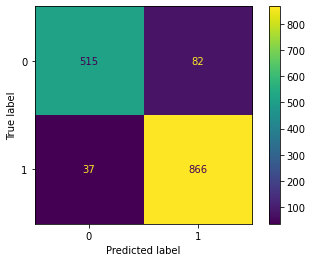

In [20]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(log_model, X_test, y_test)

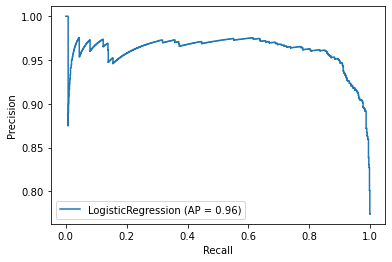

In [21]:
plot_precision_recall_curve(log_model, X_test, y_test)

[Text(0.5, 0, 'Recall'), Text(0, 0.5, 'Precision')]

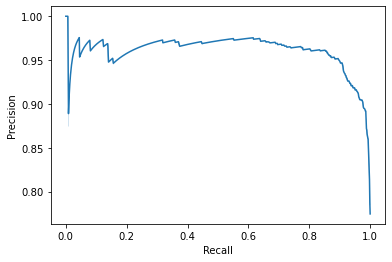

In [22]:
# Plotting the Precision Recall curve manually:
precision, recall, thresh_pr = precision_recall_curve(y_test, y_pred_prob)
    # Precision - last element is 1. total elements = 1 more than thresholds
    # Recall - last element is 0. total elements = 1 more than thresholds

# print(y_test.value_counts())
# no_skill = 903/(597+903)  # lowest precision value, if probability threshold was 0

sns.lineplot(x=recall, y=precision, markers='#').set(xlabel='Recall', ylabel='Precision')

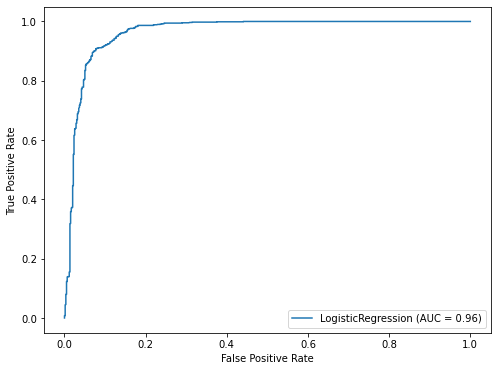

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(log_model, X_test, y_test, ax=ax)

[Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate')]

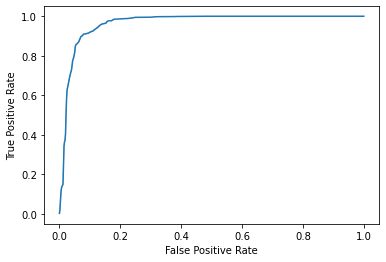

In [24]:
# Plotting the AUC curve manually:

fpr, tpr, thresh_rc = roc_curve(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, markers='#').set(xlabel='False Positive Rate', ylabel='True Positive Rate')

## Tuning the Threshold
* https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
* **G-mean & Youden's J** focus on both classes/ ROC curve
* **F-score** focuses on minority positive class only/ Precision-Recall curve

#### Method 1: G-mean - balance between Sensitivity & Specificity

Sensitivity = Recall for 1  
Specificity = Recall for 0  
metric = sqrt(Sensitivity x Specificity)

In [25]:
gmean = np.sqrt(tpr*(1-fpr))

ix = gmean.argmax()
th_gmean = thresh_rc[ix]
print('Best Gmean = {:.4f} for Threshold = {:.4f}'.format(gmean[ix],th_gmean))

Best Gmean = 0.9155 for Threshold = 0.6963


Updated matrix: 
 [[551  46]
 [ 83 820]]
Original matrix: 
 [[515  82]
 [ 37 866]]


<AxesSubplot:xlabel='False Positive Rate', ylabel='True Positive Rate'>

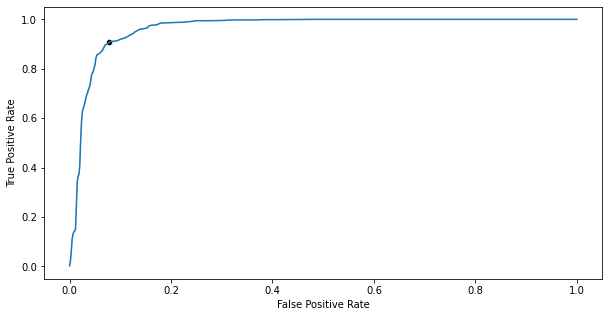

In [26]:
y_pred_gmean = [1 if i >= th_gmean else 0 for i in y_pred_prob]

print('Updated matrix: \n', confusion_matrix(y_test, y_pred_gmean))

print('Original matrix: \n', confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10,5))
sns.lineplot(x=fpr, y=tpr, markers='.').set(xlabel='False Positive Rate', ylabel='True Positive Rate')
sns.scatterplot(x=[fpr[ix]], y=[tpr[ix]], color='black', marker='o')

In [27]:
print('Updated = ', np.sqrt(551/(551+46) * 820/(820+83)))
print('Original = ',np.sqrt(515/(515+82) * 866/(866+37)))

Updated =  0.915485952829925
Original =  0.9095603493573684


#### Method 2: Youden's J Statistic (gives same result as G-mean)

metric = Sensitivity + Specificity - 1

In [28]:
youden = tpr - fpr
ix = youden.argmax()
print('Best Youden J = {:.4f} for Threshold = {:.4f}'.format(youden[ix],thresh_rc[ix]))

Best Youden J = 0.8310 for Threshold = 0.6963


#### Method 3: F-score

metric = 2 x Precision x Recall / (Precision + Recall)

Best F-score = 0.9377 for Threshold = 0.4120
Updated matrix: 
 [[502  95]
 [ 22 881]]
Original matrix: 
 [[515  82]
 [ 37 866]]


<AxesSubplot:xlabel='Recall', ylabel='Precision'>

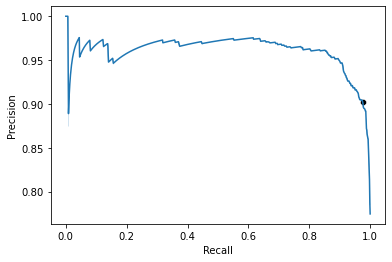

In [29]:
fscore = 2*precision*recall/(precision+recall)
ix = fscore.argmax()
th_fscore = thresh_pr[ix]
print('Best F-score = {:.4f} for Threshold = {:.4f}'.format(fscore[ix],th_fscore))

y_pred_fs = [1 if i >= th_fscore else 0 for i in y_pred_prob]

print('Updated matrix: \n', confusion_matrix(y_test, y_pred_fs))
print('Original matrix: \n', confusion_matrix(y_test, y_pred))

sns.lineplot(x=recall, y=precision, markers='#').set(xlabel='Recall', ylabel='Precision')
sns.scatterplot(x=[recall[ix]], y=[precision[ix]], color='black', marker='o')

In [30]:
print('Updated = ' , 2*881/((881+22) + (881+95)))
print('Original = ', 2*866/((866+37) + (866+82)))
#print(f1_score(y_test, y_pred_fs))
#print(f1_score(y_test, y_pred))

Updated =  0.9377328366152209
Original =  0.9357104267963263


---

## Multiclass - Iris dataset

In [31]:
path = '../../GitHub/Python-Data-Science/Data/'
df = pd.read_csv(path+'iris.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


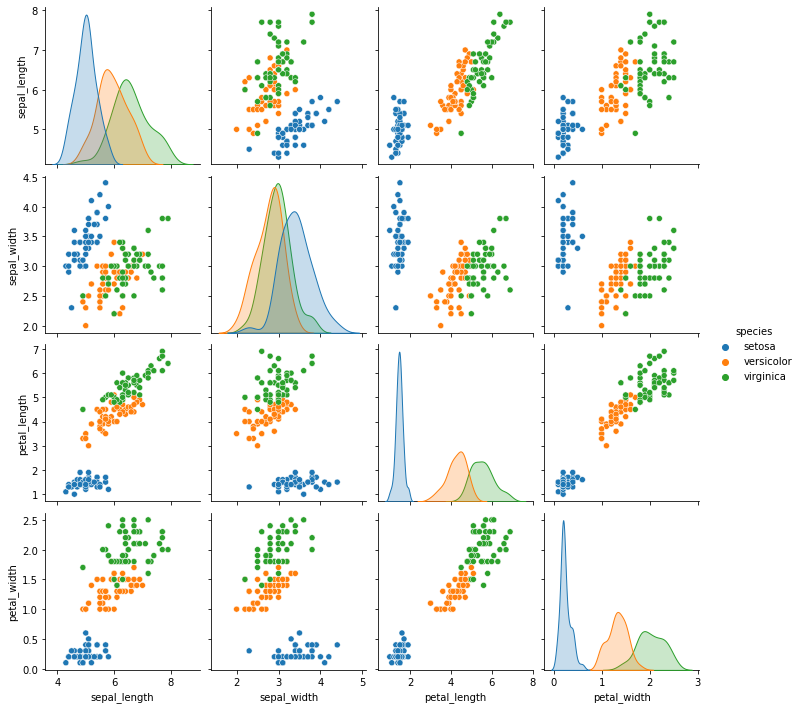

In [33]:
sns.pairplot(df, hue='species')

In [34]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [35]:
X =df.drop(columns='species')
y = df['species']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [37]:
log_model = LogisticRegression(max_iter=1000)

[[40  0  0]
 [ 0 31  2]
 [ 0  2 37]]
[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



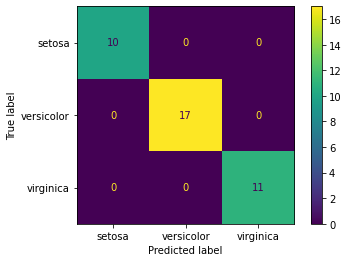

In [38]:
log_model.fit(X_train, y_train)

y_pred_train = log_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))

y_pred = log_model.predict(X_test)
plot_confusion_matrix(log_model, X_test, y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Regularization w/ Logistic Regression + GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [41]:
log_model = LogisticRegression(solver='saga', multi_class='ovr')

# ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
# multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

In [42]:
param_grid = dict(penalty= ['l1', 'l2', 'elasticnet'],
                  l1_ratio = np.linspace(0,1,10),
                  C = np.logspace(0,10,10))

# penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
# l1_ratiofloat, default=None.. The Elastic-Net mixing parameter
# C = Inverse of regularization strength; must be a positive float

In [43]:
# The cell below throws warnings that l1_ratio is not used for l1, l2 cases.. only relevant for elasticnet
# import warnings
# warnings.filterwarnings('ignore')

In [44]:
grid_model = GridSearchCV(log_model, param_grid)
grid_model.fit(X_train_n, y_train)

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: Conve

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio pa

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: Conve

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio pa

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio pa

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio pa

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio pa

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio pa

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\uditg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_it

GridSearchCV(estimator=LogisticRegression(multi_class='ovr', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [45]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'C': 12.91549665014884, 'l1_ratio': 0.0, 'penalty': 'l1'}
0.9458498023715414


In [46]:
y_pred = grid_model.predict(X_test_n)
y_pred[0:5]

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor'],
      dtype=object)

In [47]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]


In [48]:
print(confusion_matrix(y_train, grid_model.predict(X_train_n)))    
# 'ovr' - gives a little worse performance
((40+30+37)/(40+33+39))

[[40  0  0]
 [ 0 30  3]
 [ 0  2 37]]


0.9553571428571429

### Plotting for Multi-class

In [49]:
from sklearn.metrics import roc_curve, auc

In [50]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

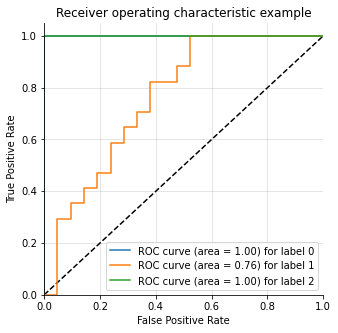

In [51]:
plot_multiclass_roc(grid_model, X_test_n, y_test, n_classes=3)

----

## Example - Heart Disease dataset
* https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [52]:
path = '../../GitHub/Python-Data-Science/Data/'
df = pd.read_csv(path+'heart.csv')

In [53]:
df.info()         # no missing values
# target = 1: heart disease, 0: no heart disease

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

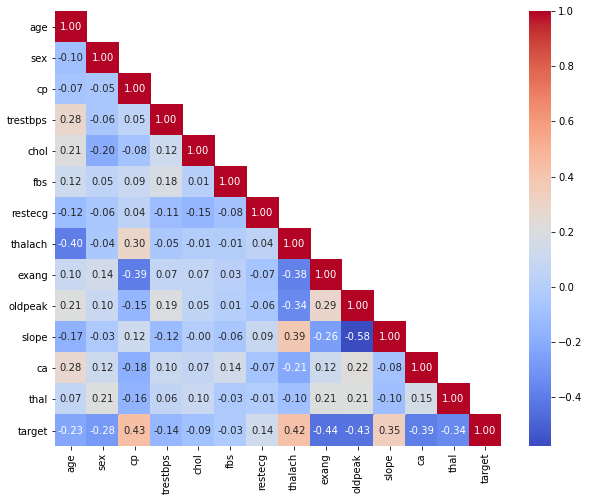

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f',
            mask = np.triu(np.ones((df.corr().shape)), k=1))

In [55]:
df.head()
# chest pain type (4 values) - ordered values
# thal also appears to be ordered

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df['target'].value_counts()           #fairly balances data

1    165
0    138
Name: target, dtype: int64

In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


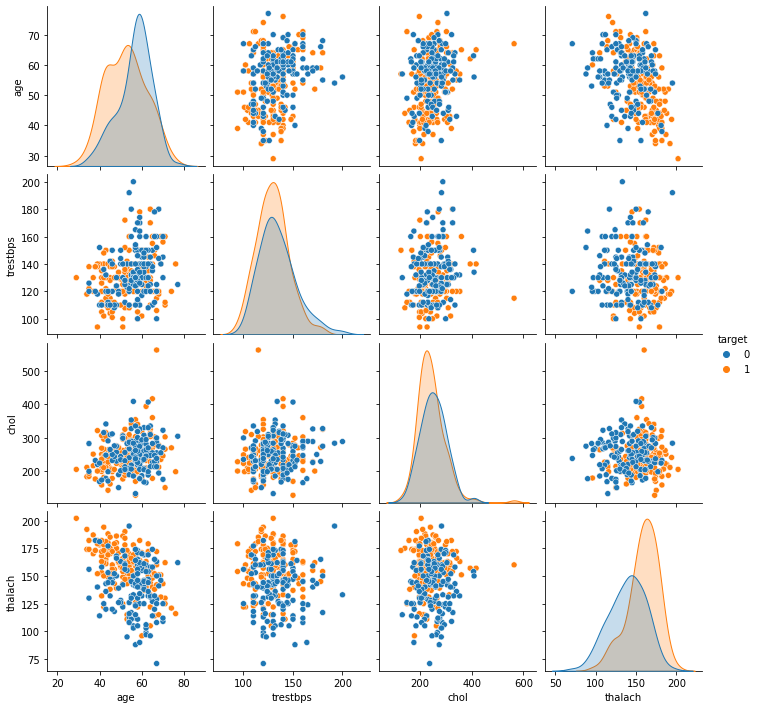

In [58]:
# Pairplot for non {0,1} variables
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue='target')

In [59]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [60]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n  = scaler.transform(X_test)

In [61]:
log_model = LogisticRegression(solver='saga')

In [62]:
 np.logspace(-4,4,10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [63]:
param_grid = dict(penalty= ['l1', 'l2'], 
                  C = np.logspace(0,10,10))

In [64]:
grid_model = GridSearchCV(log_model, param_grid)
grid_model.fit(X_train_n, y_train)

GridSearchCV(estimator=LogisticRegression(solver='saga'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [65]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'C': 1.0, 'penalty': 'l1'}
0.8346127946127945


In [66]:
# comparison to LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
log_cv = LogisticRegressionCV()     #by default runs L2 regularization
log_cv.fit(X_train_n, y_train)


print(log_cv.C_)
print(log_cv.Cs_)

[0.04641589]
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


In [67]:
coeffs = pd.Series(index=X.columns, data=grid_model.best_estimator_.coef_[0])
coeffs = coeffs.sort_values(ascending=False)
coeffs

cp          0.888036
thalach     0.422097
slope       0.357608
restecg     0.096072
fbs         0.002308
age        -0.047740
chol       -0.186568
trestbps   -0.239088
exang      -0.408572
oldpeak    -0.524634
thal       -0.564490
sex        -0.696524
ca         -0.832359
dtype: float64

<AxesSubplot:>

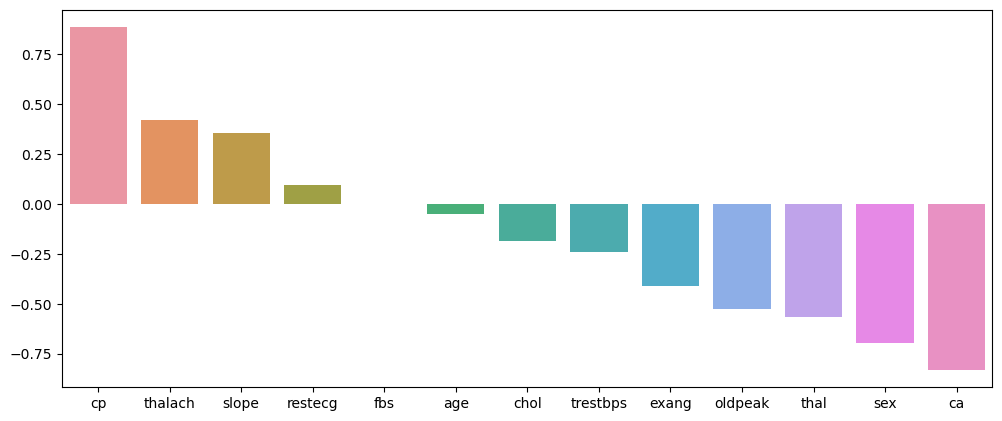

In [68]:
plt.figure(figsize=(12,5), dpi=100)
sns.barplot(x=coeffs.index, y=coeffs.values)

In [69]:
y_pred = grid_model.predict(X_test_n)

In [70]:
print(confusion_matrix(y_test, y_pred))

[[12  3]
 [ 2 14]]


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



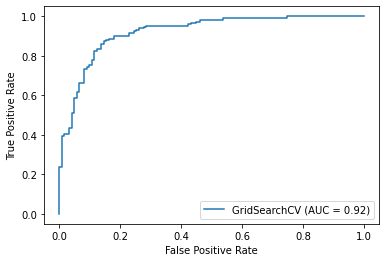

In [72]:
plot_roc_curve(grid_model, X_train_n, y_train)

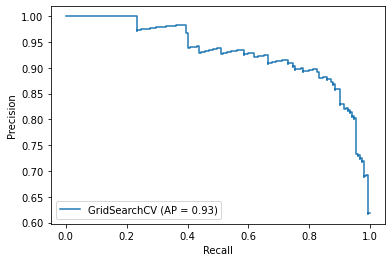

In [73]:
plot_precision_recall_curve(grid_model, X_train_n, y_train)

In [74]:
patient = [[ 54, 1, 0, 122, 286, 0, 0, 116, 1, 3.2, 1, 2, 2]]
patient_n = scaler.transform(patient)
grid_model.predict(patient_n), grid_model.predict_proba(patient_n)

(array([0], dtype=int64), array([[0.9892199, 0.0107801]]))

---

## Example - Advertising Dataset

In [75]:
path = '..\..\GitHub\\Python-Data-Science\\Data\\'
ads = pd.read_csv(path+'advertising_internet.csv')

In [76]:
ads.info()
# 'Daily Time Spent on Site': consumer time on site in minutes
# 'Age': cutomer age in years
# 'Area Income': Avg. Income of geographical area of consumer
# 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
# 'Ad Topic Line': Headline of the advertisement
# 'City': City of consumer
# 'Male': Whether or not consumer was male
# 'Country': Country of consumer
# 'Timestamp': Time at which consumer clicked on Ad or closed window
# 'Clicked on Ad': 0 or 1 indicated clicking on Ad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [77]:
ads.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
591,57.20,42,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09:36,1
307,82.70,35,61383.79,231.07,Visionary multi-tasking alliance,Amyfurt,0,Somalia,2016-01-09 15:49:28,0
490,50.19,40,33987.27,117.30,Progressive uniform budgetary management,Lake Stephenborough,0,Thailand,2016-03-25 19:02:35,1
268,40.17,26,47391.95,171.31,Visionary asymmetric encryption,South Lauratown,1,Japan,2016-02-01 14:37:34,1
252,84.54,33,64902.47,204.02,Synchronized stable complexity,North Tracyport,1,Moldova,2016-03-02 10:07:43,0


In [78]:
ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [79]:
# Hypothesis: Maybe time of the day matters? - No, look at pairplot
ads['Timestamp'] = pd.to_datetime(ads['Timestamp'])
ads['Time of Day'] = ads['Timestamp'].apply(lambda ts: ts.hour)

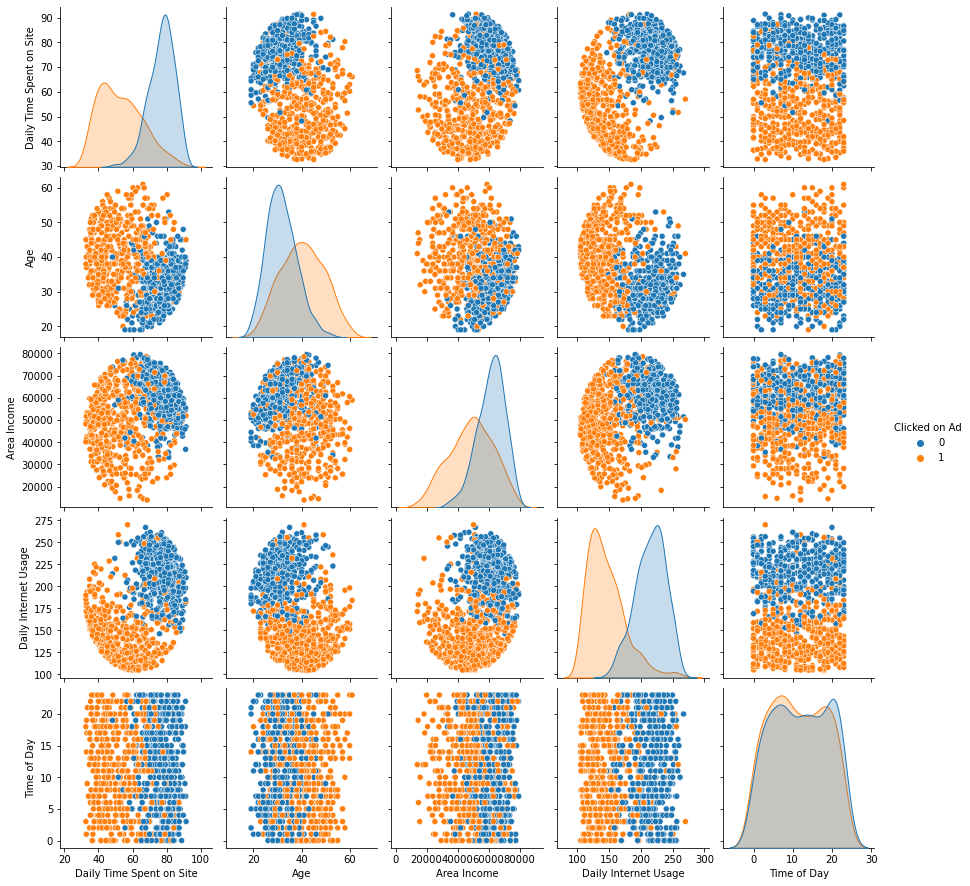

In [80]:
sns.pairplot(data = ads[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Clicked on Ad', 'Time of Day']], hue='Clicked on Ad')

<AxesSubplot:>

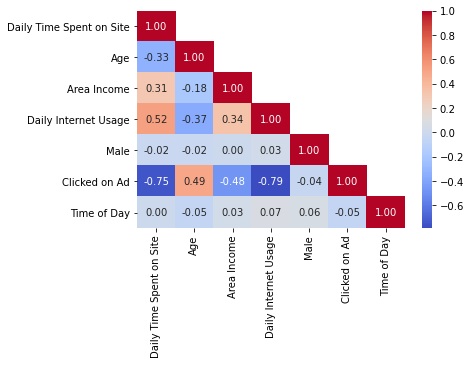

In [81]:
sns.heatmap(ads.corr(), cmap='coolwarm', annot=True, fmt='.2f', mask=np.triu(np.ones([7,7]), k=1))

array([[ 1.        , -0.33151334],
       [-0.33151334,  1.        ]])

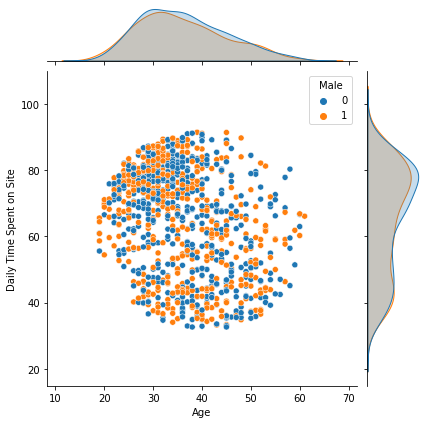

In [82]:
sns.jointplot(data=ads, x='Age', y='Daily Time Spent on Site', kind='scatter', hue='Male')
display(np.corrcoef(ads['Age'], ads['Daily Time Spent on Site']))

In [83]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Time of Day               1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 86.1+ KB


In [84]:
print(ads.columns)
X = ads[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
Y = ads['Clicked on Ad']

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Time of Day'],
      dtype='object')


In [85]:
# Fitting model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

logm = LogisticRegression(max_iter=1000)
logm.fit(X_train, Y_train)

Y_pred = logm.predict(X_test)

print(classification_report(Y_test, Y_pred))

print(confusion_matrix(Y_test, Y_pred))

(670, 5) (670,) (330, 5) (330,)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

[[170   1]
 [  5 154]]


In [86]:
Y_pred[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [87]:
Y_prob = logm.predict_proba(X_test)
display(Y_prob[0:5])

array([[8.07566969e-04, 9.99192433e-01],
       [9.96287771e-01, 3.71222906e-03],
       [9.92139788e-01, 7.86021176e-03],
       [1.84995298e-04, 9.99815005e-01],
       [9.83807886e-01, 1.61921143e-02]])

In [88]:
# Y_prob[:,1].tofile(, sep=',')  #array has 'tofile'
# Y_test.to_csv('test_true.csv')

In [89]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob[:,1]) # keep probabilities for +ve outcome
fpr_50, tpr_50, _ = roc_curve(Y_test, np.zeros(len(Y_test))) # One way to get the straight line

In [90]:
display(len(fpr), fpr)
display(len(tpr), tpr)
display(len(thresholds), thresholds)

14

array([0.        , 0.        , 0.        , 0.00584795, 0.00584795,
       0.02923977, 0.02923977, 0.04678363, 0.04678363, 0.10526316,
       0.10526316, 0.12280702, 0.12280702, 1.        ])

14

array([0.        , 0.00628931, 0.91823899, 0.91823899, 0.96855346,
       0.96855346, 0.97484277, 0.97484277, 0.98742138, 0.98742138,
       0.99371069, 0.99371069, 1.        , 1.        ])

14

array([1.99998747, 0.99998747, 0.73887852, 0.7299616 , 0.51974452,
       0.43534505, 0.32912548, 0.30097178, 0.26604722, 0.13232719,
       0.12969411, 0.09438077, 0.09016318, 0.00234333])

<AxesSubplot:xlabel='False Positive Rate', ylabel='True Positive Rate'>

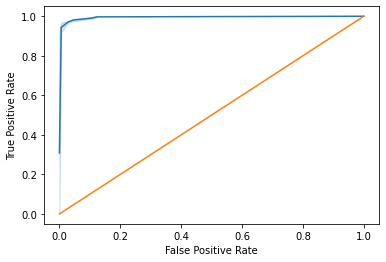

In [91]:
sns.lineplot(x=fpr, y=tpr, markers='#').set(xlabel='False Positive Rate', ylabel='True Positive Rate')
sns.lineplot(x=fpr_50, y=tpr_50)

In [92]:
auc = roc_auc_score(Y_test, Y_prob[:,1])
print('AUC: %.3f' % auc)

AUC: 0.997


In [93]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_prob[:,1])
# Precision - last element is 1. total elements = 1 more than thresholds
# Recall - last element is 0. total elements = 1 more than thresholds

In [94]:
display(precision[0:5], recall[0:5], thresholds[0:5])
display(precision[-5:], recall[-5:], thresholds[-5:])
display(len(precision), len(recall), len(thresholds))

array([0.88333333, 0.88268156, 0.88764045, 0.89265537, 0.89772727])

array([1.        , 0.99371069, 0.99371069, 0.99371069, 0.99371069])

array([0.09016318, 0.09438077, 0.09587925, 0.11358869, 0.12969411])

array([1., 1., 1., 1., 1.])

array([0.02515723, 0.01886792, 0.01257862, 0.00628931, 0.        ])

array([0.9999757 , 0.99997704, 0.99997834, 0.99998381, 0.99998747])

181

181

180

In [95]:
# ROC curves should be used when there are roughly equal numbers of observations for each class.
# Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [96]:
Y_test.value_counts()

0    171
1    159
Name: Clicked on Ad, dtype: int64

In [97]:
no_skill = 159/(159+171)  # lowest precision value, if probability threshold was 0
no_skill

0.4818181818181818

(Text(0.5, 0, 'Recall'), Text(0, 0.5, 'Precision'))

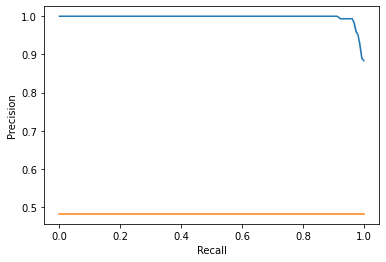

In [98]:
sns.lineplot(x=recall, y=precision, markers='#')
sns.lineplot(x=[0,1], y=[no_skill,no_skill])
plt.xlabel('Recall'), plt.ylabel('Precision')

In [99]:
f1_score(Y_test, Y_pred)

0.980891719745223

In [100]:
logm.coef_[0]

array([-1.50402484e-01,  1.35066760e-01, -9.71656343e-05, -5.82256457e-02,
        1.37805454e+00])

In [101]:
# Sign is relevant. But relevant size is not, since it depends on scale of those variables
print('Intercept = ',logm.intercept_)
coeff = pd.DataFrame(logm.coef_[0], X.columns, columns=['Coeff'])
coeff

Intercept =  [21.25387472]


,Coeff
Daily Time Spent on Site,-0.150402
Age,0.135067
Area Income,-0.000097
Daily Internet Usage,-0.058226
Male,1.378055


---

## Example - Titanic Dataset

In [102]:
path = '../../GitHub/Python-Data-Science/Data/'
train = pd.read_csv(path+'titanic_train.csv')
train.info()
# Passenger Class
# SibSp - Sibling/Spouse, Parch - Parent/Children

train = pd.read_csv('Kag_titanic_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C


In [104]:
train[train['Name'].str.contains('Andersson')].sort_values(by='Ticket')  #same ticket number for family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S


In [105]:
train.shape[0]

891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:>

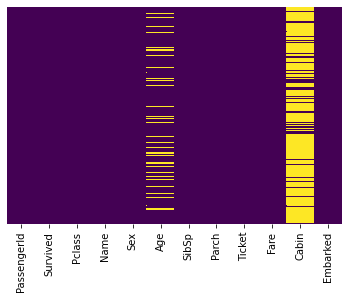

In [106]:
# Null values
display(train.isnull().mean())  #percent missing
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

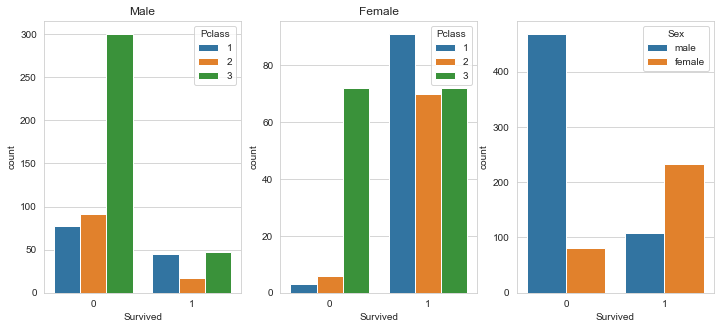

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title('Male')
sns.countplot(data=train.query('Sex=="male"')   , x='Survived', hue='Pclass')
plt.subplot(1,3,2)
plt.title('Female')
sns.countplot(data=train.query('Sex=="female"') , x='Survived', hue='Pclass')
plt.subplot(1,3,3)
sns.countplot(data=train, x='Survived', hue='Sex')

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

C:\Users\uditg\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


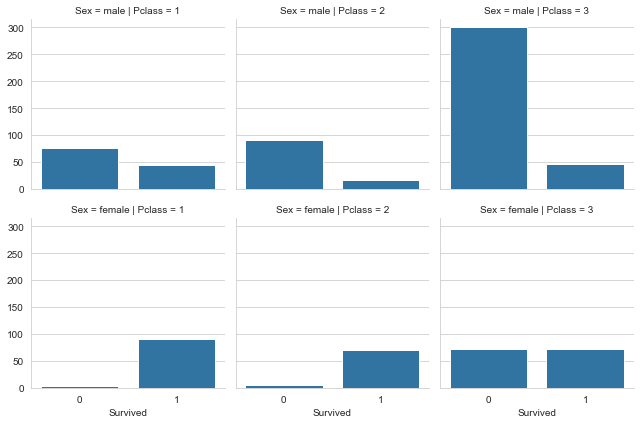

In [108]:
display(train.groupby(by=['Pclass','Sex'])['Survived'].value_counts().unstack())

g = sns.FacetGrid(data=train, col='Pclass', row='Sex')
g.map(sns.countplot, 'Survived')

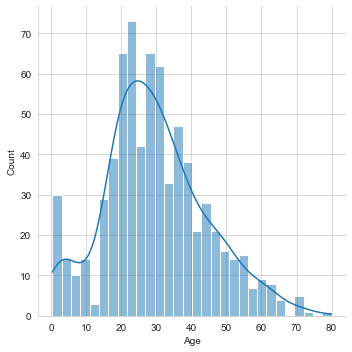

In [109]:
sns.displot(train['Age'].dropna(), kde=True, bins=30)
# sns.displot(train['Age'], kde=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

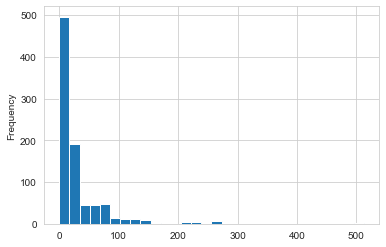

In [110]:
train['Fare'].plot.hist(bins=30)

In [111]:
#Making it interactive with Plotly
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

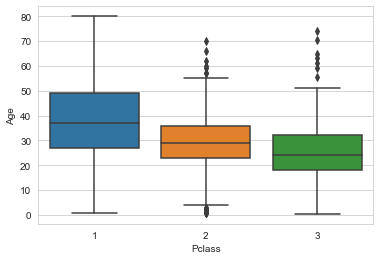

In [112]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [113]:
avgAge = train.groupby(by='Pclass').mean()['Age']
avgAge

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [114]:
#Imputing missing age
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return avgAge[Pclass]
    else:
        return Age

In [115]:
train['Agefill'] = train[['Age', 'Pclass']].apply(impute_age1, axis=1)
# axis: 0: apply function to each column. // 1: apply function to each row.

In [116]:
train[train['Age'].isna()].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agefill
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,38.233441
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S,25.140620
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,25.140620
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,25.140620
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,25.140620


<AxesSubplot:xlabel='Age', ylabel='Agefill'>

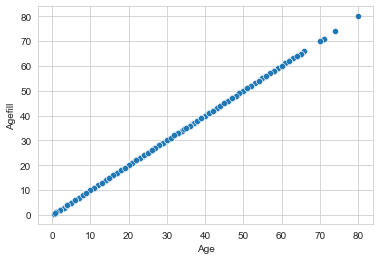

In [117]:
sns.scatterplot(data=train, x='Age', y='Agefill')

In [118]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Agefill        0.000000
dtype: float64

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Agefill      891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [120]:
train.drop(columns=['Cabin', 'Age'], inplace=True)
train.dropna(inplace=True)
print(train.isnull().mean())
print(train.info())

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Agefill        0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Agefill      889 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


In [121]:
# Family gets same ticket number. Which may be more robust than 'SibSp' - which has different value for Parents/ Children
# Cleaning Ticket numbers
import re

def extract_number(s):
    try:
        number = re.findall('\d{2,}', s)[0]
    except:
        number = '99999'
    return number

In [122]:
train['Ticket_clean'] = train['Ticket'].apply(extract_number)

In [123]:
train['Ticket_clean'].head()

0      21171
1      17599
2    3101282
3     113803
4     373450
Name: Ticket_clean, dtype: object

In [124]:
train[train['Ticket_clean']=='99999']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agefill,Ticket_clean
179,180,0,3,"Leonard, Mr. Lionel",male,0,0,LINE,0.0,S,36.0,99999
271,272,1,3,"Tornquist, Mr. William Henry",male,0,0,LINE,0.0,S,25.0,99999
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,0,0,LINE,0.0,S,19.0,99999
597,598,0,3,"Johnson, Mr. Alfred",male,0,0,LINE,0.0,S,49.0,99999
772,773,0,2,"Mack, Mrs. (Mary)",female,0,0,S.O./P.P. 3,10.5,S,57.0,99999
841,842,0,2,"Mudd, Mr. Thomas Charles",male,0,0,S.O./P.P. 3,10.5,S,16.0,99999


In [125]:
train[train['Ticket_clean'] != train['Ticket']].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agefill,Ticket_clean
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,0,0,SOTON/O2 3101272,7.1250,S,41.00000,3101272
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,0,0,C 17369,7.1417,S,24.00000,17369
549,550,1,2,"Davies, Master. John Morgan Jr",male,1,1,C.A. 33112,36.7500,S,8.00000,33112
179,180,0,3,"Leonard, Mr. Lionel",male,0,0,LINE,0.0000,S,36.00000,99999
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,0,0,SOTON/O.Q. 392087,8.0500,S,25.14062,392087


In [126]:
ticket_count = train.groupby(by='Ticket_clean')['Ticket'].count()
ticket_count

Ticket_clean
10482     1
110152    3
110413    3
110465    2
110564    1
         ..
8475      1
851       1
9234      1
9549      2
99999     6
Name: Ticket, Length: 677, dtype: int64

In [127]:
train = train.merge(ticket_count, how='left', on='Ticket_clean')

In [128]:
train.sort_values(by='Ticket_y', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket_x,Fare,Embarked,Agefill,Ticket_clean,Ticket_y
642,644,1,3,"Foo, Mr. Choong",male,0,0,1601,56.4958,S,25.14062,1601,7
836,839,1,3,"Chip, Mr. Chang",male,0,0,1601,56.4958,S,32.00000,1601,7
200,202,0,3,"Sage, Mr. Frederick",male,8,2,CA. 2343,69.5500,S,25.14062,2343,7
812,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,4,2,347082,31.2750,S,6.00000,347082,7
323,325,0,3,"Sage, Mr. George John Jr",male,8,2,CA. 2343,69.5500,S,25.14062,2343,7


In [129]:
train[train['Ticket_clean'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket_x,Fare,Embarked,Agefill,Ticket_clean,Ticket_y
13,14,0,3,"Andersson, Mr. Anders Johan",male,1,5,347082,31.275,S,39.0,347082,7
118,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,4,2,347082,31.275,S,2.0,347082,7
540,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,4,2,347082,31.275,S,9.0,347082,7
541,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,4,2,347082,31.275,S,11.0,347082,7
609,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,1,5,347082,31.275,S,39.0,347082,7
812,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,4,2,347082,31.275,S,6.0,347082,7
848,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,2,347082,31.275,S,4.0,347082,7


In [130]:
type(train['Ticket_y'][0]), type(train['SibSp'][0])

(numpy.int64, numpy.int64)

In [131]:
# Create Dummies
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [132]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [133]:
train = pd.concat([train, sex, embark], axis=1)
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket_x,Fare,Embarked,Agefill,Ticket_clean,Ticket_y,male,Q,S
262,264,0,1,"Harrison, Mr. William",male,0,0,112059,0.00,S,40.00,112059,1,1,0,1
402,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,1,0,STON/O2. 3101279,15.85,S,28.00,3101279,2,1,0,1
631,633,1,1,"Stahelin-Maeglin, Dr. Max",male,0,0,13214,30.50,C,32.00,13214,1,1,0,0
304,306,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,151.55,S,0.92,113781,4,1,0,1
569,571,1,2,"Harris, Mr. George",male,0,0,S.W./PP 752,10.50,S,62.00,752,1,1,0,1


In [134]:
train.drop(['PassengerId', 'Name', 'Sex','Embarked', 'Ticket_x','Ticket_clean', 'SibSp'], axis=1, inplace=True)
train.sample(5)

,Survived,Pclass,Parch,Fare,Agefill,Ticket_y,male,Q,S
141,1,3,0,15.8500,24.000000,2,0,0,1
278,1,3,1,20.2500,35.000000,2,0,0,1
184,0,1,0,50.0000,38.233441,1,1,0,1
201,0,3,0,6.4958,34.000000,1,1,0,1
508,1,3,0,56.4958,26.000000,7,1,0,1


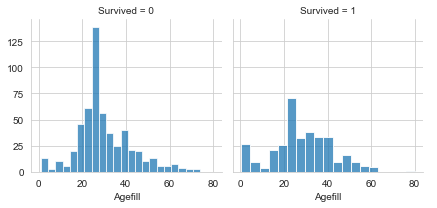

In [135]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.histplot, 'Agefill').add_legend()

In [136]:
train['Child_flag'] = train['Agefill'].apply(lambda x: 1 if x<=10 else 0)

In [137]:
train.head()

,Survived,Pclass,Parch,Fare,Agefill,Ticket_y,male,Q,S,Child_flag
0,0,3,0,7.2500,22.0,1,1,0,1,0
1,1,1,0,71.2833,38.0,1,0,0,0,0
2,1,3,0,7.9250,26.0,1,0,0,1,0
3,1,1,0,53.1000,35.0,2,0,0,1,0
4,0,3,0,8.0500,35.0,1,1,0,1,0


In [138]:
# Fitting Model
# Train/ Test split on Train data itself (because Test dataset does not have Y)
y = train['Survived']
x = train.drop(columns='Survived')

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(Y_train.shape, X_train.shape)

(622,) (622, 9)


In [139]:
logm = LogisticRegression(max_iter=1000)
logm.fit(X_train, Y_train)
Y_pred = logm.predict(X_test)

print(classification_report(Y_test, Y_pred))

print(confusion_matrix(y_true=Y_test,y_pred= Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

[[149  14]
 [ 33  71]]


In [140]:
print('{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(149/(149+33), 149/(149+14), 71/(71+14), 71/(71+33)))

0.82, 0.91, 0.84, 0.68


In [141]:
# Preparing Test data - same as train data

test = pd.read_csv(path+'titanic_test.csv')
test_pid = test['PassengerId']
print(test.info())
 
# Cleaning Test Data
test['Agefill'] = test[['Age', 'Pclass']].apply(impute_age1, axis=1)
test.drop(columns=['Cabin','Age'], inplace=True)

test.fillna(np.mean(test), inplace=True)            # Change from Train method - used for Fare

test['Ticket_clean'] = test['Ticket'].apply(extract_number)

ticket_count = test.groupby(by='Ticket_clean')['Ticket'].count()
ticket_count

test = test.merge(ticket_count, how='left', on='Ticket_clean')

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2  

In [142]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)
#display(sex.head(), embark.head())

test = pd.concat([test, sex, embark], axis=1)
test.drop(['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket_x','Ticket_clean', 'SibSp'], axis=1, inplace=True)

test['Child_flag'] = test['Agefill'].apply(lambda x: 1 if x<=10 else 0)

test.head()

,Pclass,Parch,Fare,Agefill,Ticket_y,male,Q,S,Child_flag
0,3,0,7.8292,34.5,1,1,1,0,0
1,3,0,7.0000,47.0,1,0,0,1,0
2,2,0,9.6875,62.0,1,1,1,0,0
3,3,0,8.6625,27.0,1,1,0,1,0
4,3,1,12.2875,22.0,1,0,0,1,0


In [143]:
Y_test_pred = logm.predict(test)
pd.DataFrame(Y_test_pred, columns=['Survived'], index = test_pid).to_csv('TTN_1_logistic.csv')

In [144]:
# Fitting model on all Training data:

logm = LogisticRegression(max_iter=1000)
logm.fit(x, y)
Y_pred = logm.predict(x)

print(classification_report(y, Y_pred))

print(confusion_matrix(y_true=y,y_pred= Y_pred, labels=[0,1]))

Y_test_pred = logm.predict(test)
pd.DataFrame(Y_test_pred, columns=['Survived'], index = test_pid).to_csv('TTN_2_logistic.csv')

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.71      0.75       340

    accuracy                           0.81       889
   macro avg       0.81      0.79      0.80       889
weighted avg       0.81      0.81      0.81       889

[[480  69]
 [ 97 243]]


----